# *1．要点*

●勾配消失問題

・誤差逆伝播法が階層に進んでいくにつれて勾配がどんどん緩やかになっていく。そのため勾配降下法による更新では階層のパラメータはほとんど変わらず、学習は最適値に収束しなくなる。

●シグモイド関数

$f(u) = \frac{1}{1+e^{-u}}$

・勾配消失問題が生じる代表的な活性化関数


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))

In [ ]:
x = np.arange(-10, 10, 0.1)

In [ ]:
y = sigmoid(x)

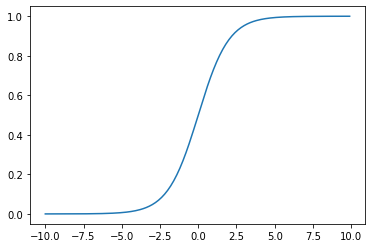

In [ ]:
plt.plot(x,y)

・シグモイド関数の課題：大きな値では出力の変化が微小なため**勾配消失問題**を引き起こすことがあった

・シグモイド関数の微分

In [ ]:
def sigmoid_d(x):
  return (1 - sigmoid(x)) * sigmoid(x)

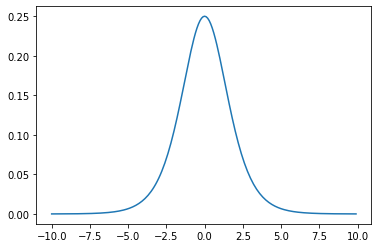

In [ ]:
plt.plot(x, sigmoid_d(x))

・シグモイド関数の微分における最大値は0.25であり、誤差逆伝播法の層数が多くなると値が小さくなってしまう。

●勾配消失の解決方法

・活性化関数の選択

・重みの初期値の設定方法

・バッチ正規化

①活性化関数の選択

　・Relu関数

$f(x) = \left\{ \begin{array}{}
x\;\;\;( x > 0 ) \\
0  ( x \leq 0 )
\end{array} \right.
$

In [ ]:
def relu(x):
  return np.maximum(0, x)

In [ ]:
y = relu(x)

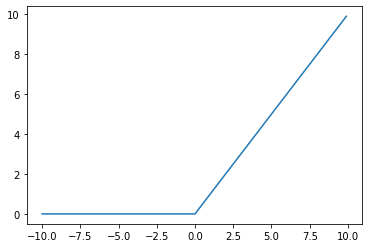

In [ ]:
plt.plot(x,y)

 ・Relu関数の微分は入力が　$x > 0$ の場合は1となり $x \leq 0$　の場合は0となる

 ・勾配消失問題の回避とスパース化に貢献することでよい成果をもたらしている。

②重みの初期値設定

　・通常、重みの初期化は正規分布に従った乱数を用いる

　・標準正規分布：平均が0で分散が1

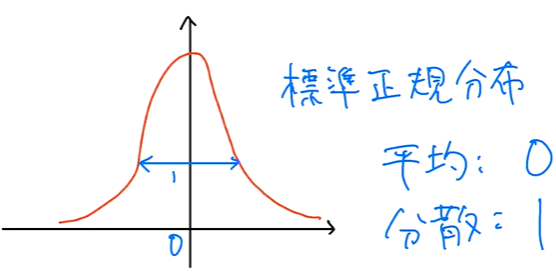

　・標準正規分布に従った乱数を用いた重みの初期化では勾配消失が生じる

　・そこで標準正規分布に工夫を加えた初期値の設定方法　Xavier（ザビエル）の登場

network["W1"] = np.random.randn(input_layer_size, hidden_layer_size) / np.aqrt(input_layer_size)

network["W2"] = np.random.randn(hidden_layer_size, output_layer_size) / np.aqrt(hidden_layer_size)

 ・Xavierによる初期値の設定方法
 　→　重みの要素を前の層のノード数の平方根で除算した値を用いる

 ・Xavierの初期値を設定する際の活性化関数：Relu関数，シグモイド関数，双曲線正接関数

 ・Heによる初期値の設定方法
 　→　重みの要素を前の層のノード数の平方根で除算した値に対し$\sqrt2$を掛け合わせえた値を用いる
 　→　正規分布の重みを$\sqrt{\frac{2}{n}}$の標準偏差の分布にする（n:前の層のノード数）

 
network["W1"] = np.random.randn(input_layer_size, hidden_layer_size) / np.aqrt(input_layer_size) * np.sqrt(2)

network["W2"] = np.random.randn(hidden_layer_size, output_layer_size) / np.aqrt(hidden_layer_size) * np.sqrt(2)



③バッチ正規化

・ミニバッチ単位で入力値のデータの偏りを抑制する方法

・活性化関数に値を渡す前後にバッチ正規化の処理を孕んだ層を加える

・バッチ正規化の数学的記述

$1.\;\;\mu_t = \displaystyle\frac{1}{N_t}\sum^{N_t}_{i=1}x_{ni} \\ 2.\;\; \sigma_t^2 = \displaystyle\frac{1}{N_t}\displaystyle\sum^{N_t}_{i=1}(x_{ni} - \mu_t)^2 \\ 
3.\;\;\hat{x}_{ni} = \displaystyle\frac{x_{ni}-\mu_t}{\sqrt{\sigma_t^2 + \theta}}  \\ 
4.\;\;y_{ni} = \gamma x_{ni} + \beta $


$\mu_t :　ミニバッチt全体の平均$

$\sigma _t^2 : ミニバッチt全体の標準偏差$

$ N_t : ミニバッチのインデックス$

$\hat{x_{ni}} : 0に値を近づける計算（0を中心とするセンタリング）と正規化を施した値$

$\gamma : スケーリングパラメータ$

$\beta  : シフトパラメータ$

$y_{ni} : ミニバッチのインデックス値とスケーリングの積にシフトを加算した値（バッチ正規化オペレーションの出力）$





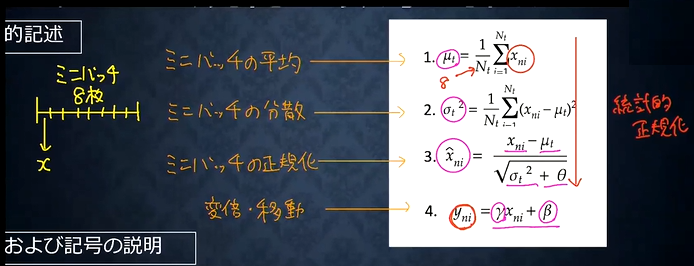

**例題チャレンジ**

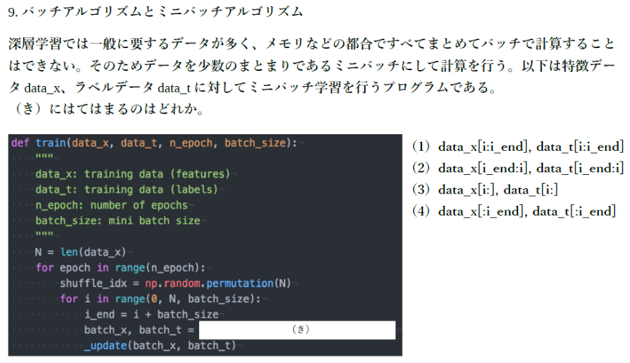

**正解**：(1)

# *2．確認テスト*

**確認テスト　連鎖率の原理を使い　dz/dx を求めよ**

$ z = t^2 \\ t = x + y$


**解答**

$\frac{dz}{dt} = 2t \\ \frac{dt}{dx} = 1 \\ \frac{dz}{dx} = \frac{dz}{dt} \frac{dt}{dx} = 2t = 2(x+y)$

**確認テスト　シグモイド関数を微分した時、入力値が0のときに最大値をとる。その値を答えよ**

**解答**　：0.25

**確認テスト　重みの初期値に0を設定るるとどのような問題が発生するか**

**解答**　：重みを0として初期化すると正しい学習が行えない。すべての重みの値が均一に更新されるため多数の重みをもつ意味がなくなる。

# *3．実装演習*

# *準備*

## Googleドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/E/stage3/DNN_code_colab_lesson_1_2')

# importと関数定義

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")


# vanishing gradient modified

## multi layer network class

In [ ]:
import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt


class MultiLayerNet:
    '''
    input_size: 入力層のノード数
    hidden_size_list: 隠れ層のノード数のリスト
    output_size: 出力層のノード数
    activation: 活性化関数
    weight_init_std: 重みの初期化方法
    '''
    def __init__(self, input_size, hidden_size_list, output_size, activation='relu', weight_init_std='relu'):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成, sigmoidとreluのみ扱う
        activation_layer = {'sigmoid': layers.Sigmoid, 'relu': layers.Relu}
        self.layers = OrderedDict() # 追加した順番に格納
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = layers.Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = layers.Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = layers.SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])

            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, d):
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]

        return self.last_layer.forward(y, d) + weight_decay

    def accuracy(self, x, d):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if d.ndim != 1 : d = np.argmax(d, axis=1)

        accuracy = np.sum(y == d) / float(x.shape[0])
        return accuracy

    def gradient(self, x, d):
        # forward
        self.loss(x, d)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        for idx in range(1, self.hidden_layer_num+2):
            grad['W' + str(idx)] = self.layers['Affine' + str(idx)].dW
            grad['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grad


## vanishing sample
## sigmoid - gauss

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.17
                : 40. 正答率(テスト) = 0.0982
Generation: 50. 正答率(トレーニング) = 0.16
                : 50. 正答率(テスト) = 0.101
Generation: 60. 正答率(トレーニング) = 0.09
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.17
                : 70. 正答率(テスト) = 0.098
Generation: 80. 正答率(トレーニング) = 0.15
                : 80. 正答率(テスト) = 0.1032
Generation: 90. 正答率(トレーニング) = 0.18
                : 90. 正答率(テスト) = 0.1032
Generation: 100. 正答率(トレーニング) = 0.08
                : 100. 正答率(テスト) = 0.1032
Generation: 110. 正答率(トレーニング) = 0.08
                : 110. 正答率(テスト) = 0.1032
Generation: 120. 正答率(トレーニング) = 0.1
                : 120. 正答率(テスト) = 0.1028
Generation: 130. 正答率(トレーニング) = 0.11
                : 130. 正答率(テスト) = 0.1135
Generation

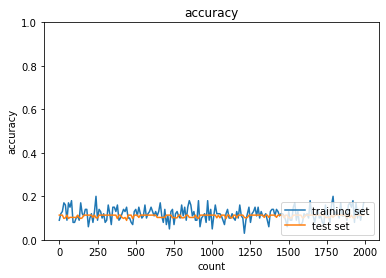

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## ReLU - gauss

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.08
                : 10. 正答率(テスト) = 0.1032
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.1028
Generation: 30. 正答率(トレーニング) = 0.15
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.05
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.09
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.17
                : 60. 正答率(テスト) = 0.101
Generation: 70. 正答率(トレーニング) = 0.08
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.11
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.12
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.08
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.11
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.15
                : 130. 正答率(テスト) = 0.1135
Generati

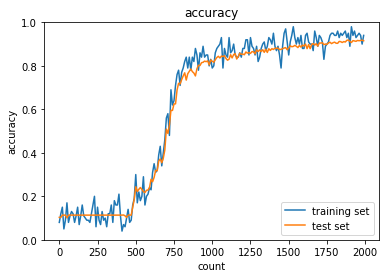

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## sigmoid - Xavier

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.0887
Generation: 20. 正答率(トレーニング) = 0.16
                : 20. 正答率(テスト) = 0.1387
Generation: 30. 正答率(トレーニング) = 0.16
                : 30. 正答率(テスト) = 0.1095
Generation: 40. 正答率(トレーニング) = 0.18
                : 40. 正答率(テスト) = 0.1985
Generation: 50. 正答率(トレーニング) = 0.14
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.09
                : 60. 正答率(テスト) = 0.1225
Generation: 70. 正答率(トレーニング) = 0.06
                : 70. 正答率(テスト) = 0.1195
Generation: 80. 正答率(トレーニング) = 0.27
                : 80. 正答率(テスト) = 0.2143
Generation: 90. 正答率(トレーニング) = 0.33
                : 90. 正答率(テスト) = 0.241
Generation: 100. 正答率(トレーニング) = 0.31
                : 100. 正答率(テスト) = 0.2667
Generation: 110. 正答率(トレーニング) = 0.29
                : 110. 正答率(テスト) = 0.2136
Generation: 120. 正答率(トレーニング) = 0.24
                : 120. 正答率(テスト) = 0.2462
Generation: 130. 正答率(トレーニング) = 0.36
                : 130. 正答率(テスト) = 0.3426
Generati

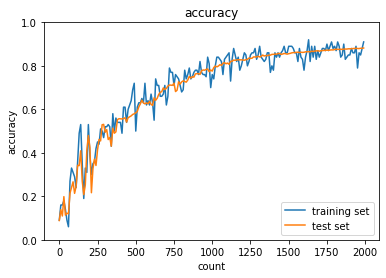

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='Xavier')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## ReLU - He

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.45
                : 10. 正答率(テスト) = 0.4399
Generation: 20. 正答率(トレーニング) = 0.67
                : 20. 正答率(テスト) = 0.588
Generation: 30. 正答率(トレーニング) = 0.75
                : 30. 正答率(テスト) = 0.6778
Generation: 40. 正答率(トレーニング) = 0.76
                : 40. 正答率(テスト) = 0.7596
Generation: 50. 正答率(トレーニング) = 0.78
                : 50. 正答率(テスト) = 0.7772
Generation: 60. 正答率(トレーニング) = 0.83
                : 60. 正答率(テスト) = 0.8035
Generation: 70. 正答率(トレーニング) = 0.83
                : 70. 正答率(テスト) = 0.8344
Generation: 80. 正答率(トレーニング) = 0.85
                : 80. 正答率(テスト) = 0.8471
Generation: 90. 正答率(トレーニング) = 0.91
                : 90. 正答率(テスト) = 0.8552
Generation: 100. 正答率(トレーニング) = 0.89
                : 100. 正答率(テスト) = 0.8595
Generation: 110. 正答率(トレーニング) = 0.9
                : 110. 正答率(テスト) = 0.87
Generation: 120. 正答率(トレーニング) = 0.9
                : 120. 正答率(テスト) = 0.8781
Generation: 130. 正答率(トレーニング) = 0.88
                : 130. 正答率(テスト) = 0.8856
Generation: 

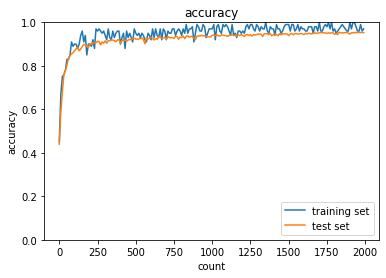

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='He')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] hidden_size_listの数字を変更してみよう

## [try] sigmoid - He と relu - Xavier についても試してみよう
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# batch normalization

In [ ]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer

# バッチ正則化 layer
class BatchNormalization:
    '''
    gamma: スケール係数
    beta: オフセット
    momentum: 慣性
    running_mean: テスト時に使用する平均
    running_var: テスト時に使用する分散
    '''
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None

        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0) # 平均
            xc = x - mu # xをセンタリング
            var = np.mean(xc**2, axis=0) # 分散
            std = np.sqrt(var + 10e-7) # スケーリング
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu # 平均値の加重平均
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var #分散値の加重平均
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        
        return out

    def backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta

        return dx    


In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")


# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='sigmoid', weight_init_std='Xavier', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] 活性化関数や重みの初期値を変えてみよう
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------